# <center>An Analysis of the Probability of Employee Attrition using </center> <center>Artificial Neural Network in TensorFlow </center>

## 1. Introduction:

<p style="text-align: justify;"><font size="3"> According to the article presented previously on the RHAnalytics problem, the approach used so far aims to present which employees tend to ask for resignation, through the application of a Logistic Regression model [1]. </font></p>

<p style="text-align: justify;"><font size="3">In this sense, this article aims to present which employees have a greater possibility of requesting resignation through the application of the Neural Networks model, besides presenting explanations about such requests.</font></p>

## 2. Neural Network
### I. Principles of Operation

<p style="text-align: justify;"><font size="3"> 
Artificial Neural Networks (ANN) are computational techniques that present a mathematical model inspired by the biological neural structure. ANN are able to perform machine learning as well as pattern recognition.
</font></p>

<p style="text-align: justify;"><font size="3"> 
The most important property of neural networks is the ability to learn the behavior of the environment and thereby improve their performance. This is done through an interactive process of adjustments applied to their weights, the training.
</font></p>

<p style="text-align: justify;"><font size="3"> 
The neurons of an ANN must be connected to each other and arranged in layers. Neurons of the same layer usually behave in the same way, using the same activation function. The arrangement of the neurons in the layers and the pattern of connection between them define the ANN architecture, as can be seen in the figure below [2]:
</font></p>

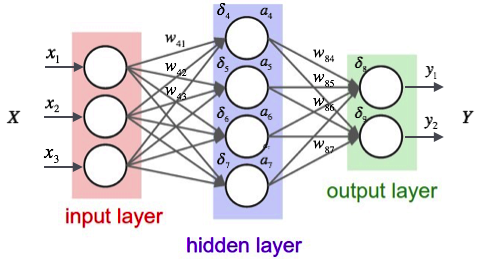

- 
<p style="text-align: justify;"><font size="3">
Input Layer, in which the units receive the features;
</font></p>

- 
<p style="text-align: justify;"><font size="3">
Intermediate layer (hidden layer), where processing is performed and the extraction of characteristics occurs; and
</font></p>

- 
<p style="text-align: justify;"><font size="3">
Output layer, which concludes and displays the labels.
</font></p>

<p style="text-align: justify;"><font size="3">A special unit known as bias is applied in some layers to increase the limits of freedom, allowing a better adjustment of the behaviour of the neural network to the knowledge proposed.
</font></p>


<p style="text-align: justify;"><font size="3">
A sigmoid function is an activation function commonly used in the field of machine learning.
Its first derivative (which we will use during the backpropagation step of our training algorithm) has the following formula:
</font></p>

$$θ \left ( x \right ) = \frac{1}{1+e^{-x}}$$

$$\frac{dθ\left(x\right)}{d\left(x\right)} = θ\left(x\right) . (1 - θ\left(x\right))$$

<p style="text-align: justify;"><font size="3"> A neural network may have one or multiple layers. The higher the number of layers, the more complex behavior the model can learn. On the other hand, a great number of layers and nodes can lead to overfitting, where the neural network doesn't generalize anymore and don't perform well. In more technical terms, the number of layers defines the ability to represent the relations between the input space and the output space. In the absence of any intermediate layer, characteristic of the perceptron model conditions it to represent only linearly independent relations, acting as a logistic regression model [1]. The existence of intermediate layers unlock the possibilities of the model. With only one intermediate layer, the MLP can represent (with any degree of approximation, however small) any continuous function. Two or more layers extend the universe of representation to any function, continuous or not.
</font></p>

### II. Implementation 

<p style="text-align: justify;"><font size="3">
For the development and analysis of the solution with Neural Network, some frameworks for Machine Learning are used. Some this frameworks are available in the Intel Distribution for Python, a package capable of accelerate and scale the application performance.
</font></p>

<p style="text-align: justify;"><font size="3">
The most important framework for this application is TensorFlow, an open source software library for Machine Intelligence and numerical computation using data flow graphs.
</font></p>

### 2.2 Loading Data

<p style="text-align: justify;"><font size="3"> 
In this part, the dataset, presented in a .csv file, is opened and read. All its content is attached to a variable. After that, a Pandas's DataFrame is created with the data.
The DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. 
</font><p>

<p style="text-align: justify;"><font size="3"> 
- <u>Pandas</u>: is a Python package providing fast, flexible, and expressive data structures.
</font><p>

In [7]:
import pandas as pd

In [8]:
hr_df = pd.read_csv("RH_2015-r.csv")
hr_df.head()

,row,Id,Attrition,Age,CivilStatus,Education,Salary,ContractType,MonthsAtCompany,NumSalaryChanges,NumJobPositionChanges,HadPromotion,Occupation,Insalubrity,Periculosity,UnionMember,Stability,HomeDistance,HomeTime,HasDependents
0,1,1160,Yes,27,Single,5,8.45,1,35,1,0,No,13,Yes,No,No,No,1,3,No
1,2,1175,Yes,43,United,3,2.91,1,10,1,0,No,13,Yes,No,No,No,17,29,No
2,3,1176,Yes,30,Single,3,3.40,1,53,1,0,No,13,Yes,No,No,No,8,19,No
3,4,1136,Yes,42,United,5,11.71,1,100,1,0,No,13,Yes,No,No,No,10,24,No
4,5,1135,Yes,33,Single,5,8.01,1,30,1,0,No,13,Yes,No,No,No,0,2,No


### 2.3  Pre-processing

<p style="text-align: justify;"><font size="3">
The first step to apply the Neural Network consists of the pre-processing of the data. Some of the characteristics derived from the used dataset contains values that the classification model cannot process (qualitative) or that need refinement. For this purpose, it is used the sklearn library, which presents suitable methods for the treatment of the data with LabelEncoder to normalize labels.
</font><p>

<p style="text-align: justify;"><font size="3">
- <u>Matplotlib</u>: is a Python 2D plotting library.
- <u>Numpy</u>: is a fundamental package of the Python language that allows to work with arrays, vectors and matrices of N dimensions.
- <u> Sklearn</u>: is a machine learning library used in this case to allow the verification of the features with the library lime. 
- <u> Xgboost</u>: is a library that implements the XGBoost machine learning algorithm.
</font><p>

In [9]:
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

<p style="text-align: justify;"><font size="3">
First the pandas representation is converted to a numpy-array representation using the method .as_matrix().
</font></p>

<p style="text-align: justify;"><font size="3">
sklearn.preprocessing is a module that includes scaling, centering, normalization, binarization and imputation methods. In this case is used LabelEncoder() to encode labels with value between 0 and n_classes-1.
</font></p>

In [10]:
data = hr_df.as_matrix()
labels = data[:, 2]

le = sklearn.preprocessing.LabelEncoder()
le.fit(labels)
labels = le.transform(labels)
class_names = le.classes_

data = data[:, 3:20]

<p style="text-align: justify;"><font size="3">
The next step is create two lists, the first one with the categorical features index to be used with the Lime library, and the second with the names of the features.
</font></p>

In [11]:
categorical_features = [1, 2, 4, 8, 9, 10, 11, 12, 13, 16]
feature_names = list(hr_df[hr_df.columns[3:20]])

In [12]:
categorical_names = {}
for feature in categorical_features:
    le = sklearn.preprocessing.LabelEncoder()
    le.fit(data[:, feature])
    data[:, feature] = le.transform(data[:, feature])
    categorical_names[feature] = le.classes_

In [13]:
data = data.astype(float)

<p style="text-align: justify;"><font size="3">
Here the function OneHotEncoder is used to create an object called encoder that will be used to perform the one-hot encoding of the data.
</font></p>

In [14]:
encoder = sklearn.preprocessing.OneHotEncoder(categorical_features=categorical_features)

### 2.4 Data Splitting

<p style="text-align: justify;"><font size="3">
When training a machine learning model, it is important to perform the accuracy check during or after training. For this purpose, the cross-validation technique can be used. It is the separation of the dataset into 2 parts, one for training and another for validation. The data for each set must be unique.
</font></p>

<p style="text-align: justify;"><font size="3">
In this application, the cross-validation method used is the holdout, where the data is separated before the training and maintained throughout the process. As the partitioning of the data occurs in a random and different way in each execution, variations of accuracy can occur in the final result.
</font></p>

<p style="text-align: justify;"><font size="3">After splitting the data, its content is one-hot encoded. Then, the toarray() method is used to convert the data in a numpy representation. To ensure the same representation for the labels data, some data manipulation are made.
</font></p>

<p style="text-align: justify;"><font size="3">
Until now, the problem has only one output. However, to use the Softmax activation function in the output of the neural network, it is necessary to have at least to outputs. In this sense, some data manipulation is accomplished to split the output in two columns.
</font></p>

<p style="text-align: justify;"><font size="3">
The next step is the construction of the classifier model. 
</font><p>

In [15]:
np.random.seed(1)
train, test, labels_train, labels_test = cross_validation.train_test_split(data, labels, train_size=0.80)

In [16]:
encoder.fit(data)
encoded_train = encoder.transform(train)
encoded_test = encoder.transform(test)

encoded_train = encoded_train.toarray()
encoded_test = encoded_test.toarray()

labels_train = np.array([labels_train])
labels_test = np.array([labels_test])
labels_train = np.transpose(labels_train)
labels_test = np.transpose(labels_test)

shape_train = np.shape(labels_train)[0]
shape_test = np.shape(labels_test)[0]

labels_train_01 = np.zeros([shape_train,2])
labels_test_01 = np.zeros([shape_test,2])

for i in range(shape_train):
    if(labels_train[i] == 1):
        labels_train_01[i][1] = 1
    else:
        labels_train_01[i][0] = 1

for i in range(shape_test):
    if(labels_test[i] == 1):
        labels_test_01[i][1] = 1
    else:
        labels_test_01[i][0] = 1       

<p style="text-align: justify;"><font size="3">
To define the most efficient amount of neurons per layer, a loop was implemented comparing the best accuracy value for a given interval.
</font></p>

### 2.5 Model Specification

<p style="text-align: justify;"><font size="3">
To start the specification of the model, it is necessary to define the points of entry and exit of the data, these being characterized in Tensorflow by the tf.placeholder. At this point, you define the type and format of the data that will be used. 
<font></p></p>

<p style="text-align: justify;"><font size="3">
In the sequence, the variables of weights (w) and bias (b) are created. In Tensorflow, the tf.Variable command is used to perform this task. Along with this procedure, it is important to define the initial values of these variables, which can be zero, one or random. 
</font></p></p>

<p style="text-align: justify;"><font size="3">
After this procedure, the template must be specified. Using the methods available in Tensorflow (tf.add / tf.matmul) for each layer, it is possible to add to the code the formula presented at the beginning of the text. As mentioned before, after each layer of nodes, an activation function must be placed. In this case, the choosen one was the Sigmoid. 
</font></p>

<p style="text-align: justify;"><font size="3">
Each operation performed using TensorFlow methods generates a node, and the connection of all this nodes is called a Graph.
</font></p>

In [18]:
import tensorflow as tf

In [19]:
n_out = 2
n_in = 55
n_nodes1 = 30
n_nodes2 = 130
n_nodes3 = 18
epochs = 2000

In [20]:
x = tf.placeholder('float',[None, n_in])
y = tf.placeholder('float',[None,n_out])

w1 = tf.Variable(tf.random_normal([n_in, n_nodes1]))
b1 = tf.Variable(tf.random_normal([n_nodes1]))
w2 = tf.Variable(tf.random_normal([n_nodes1,n_nodes2]))
b2 = tf.Variable(tf.random_normal([n_nodes2]))
w3 = tf.Variable(tf.random_normal([n_nodes2,n_nodes3]))
b3 = tf.Variable(tf.random_normal([n_nodes3]))
w_out = tf.Variable(tf.random_normal([n_nodes3,n_out]))
b_out = tf.Variable(tf.random_normal([n_out]))

layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x,w1),b1))
layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1,w2),b2))
layer3 = tf.nn.sigmoid(tf.add(tf.matmul(layer2,w3),b3))
layer_out = tf.add(tf.matmul(layer3,w_out),b_out)

- 
<p style="text-align: justify;"><font size="3">
Cost: The cost function is used to estimate the error between the created model and the desired output value. The calculation is done for all input data inserted in the training step and the result is the mean value of the errors, provided by the tf.reduce_mean method.</font></p>



- 
<p style="text-align: justify;"><font size="3">
Optimizer: The resulting value from the cost function is passed on to the optimizer so that it can adjust the parameters of the model. The parameters are contained in the variables weight and bias. In each training epoch, the error is calculated and a small adjustment is made to the values. The adjustment ratio is defined by the learning_rate parameter, whose value must be specified empirically. Very large values of learning_rate can cause the model to diverge, on the other hand, very small values will generate very slow training and the possibility of the model not converging to an optimal value.</font></p>

<p style="text-align: justify;"><font size="3">After specifying the model, it is necessary to define the cost function that will be used. As a cost function, the Cross-Entropy method was used, usually recommended for classification problems. Tensorflow provides a Cross Entropy with integrated Softmax activation function.</font></p>

In [22]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=layer_out,labels=y))

<p style="text-align: justify;"><font size="3">
It is also necessary to define the optimization function. Thus, among the various options available, the optimizer Adam was selected. It is a gradient descent optimizer that through a series of extra calculations performs accurate and smooth updates. In addition, it was the one that presented the best result in the application of the model. 
</font></p>

In [23]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

<p style="text-align: justify;"><font size="3">
For measurement of the accuracy of the model, the two lines below are used. In the first one, the output layer and the output placeholder must be specified.   
</font></p>

In [24]:
correct = tf.equal(tf.argmax(layer_out,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct,'float'))

<p style="text-align: justify;"><font size="3">
Before starts using the variables created in the definition of the model, Tensorflow requires the initialization of them. For this purpose it is used the tf.global_variables_initializer, which must be executed inside the Session before anything else. 
</font></p>

In [25]:
init = tf.global_variables_initializer()

<p style="text-align: justify;"><font size="3">
All the definitions made using the Tensorflow methods can not be executed directly. For the process of learning and verifying the model, it is necessary to create a tf.Session.
</font></p>

<p style="text-align: justify;"><font size="3">
Weights and bias variables cannot be used before this procedure.
</font></p>

<p style="text-align: justify;"><font size="3">
The training process must occur within tf.Session and can be executed as many epochs as necessary or until the system converges to the desired precision. For this, it's necessary to create a loop specifying the number of iterations. The optimization process is executed at the same time that the training data is inserted (feed_dict) to the model through the placeholders.
</font></p>

<p style="text-align: justify;"><font size="3">
In the presented problem, both the optimizer and the cost function are executed together, in order to follow the evolution of the training process. If it is necessary, the execution can be splitted, one by each process. The value returned from the cost function, which is the average of the calculated errors, is then appended to a list.
</font></p>

### 2.6 Execution of Test

<p style="text-align: justify;"><font size="3">
After completing the training, the cost values are plotted in the form of a time graph for better visualization. With this, it is possible to verify that the model has been successfully trained.</font></p>

<p style="text-align: justify;"><font size="3">
After each epoch of training, the accuracy of the model is verified through the accuracy function, using the test data. The result of the test is appended to a list for posterior visualization. 
</font></p>

In [26]:
with tf.Session() as sess:
    sess.run(init)
    b = []
    for i in range(epochs):
        _, lost = sess.run([optimizer,cost],feed_dict={x:encoded_train,y:labels_train_01})
        a = 100*sess.run(accuracy,feed_dict={x:encoded_test,y:labels_test_01})
        b.append(a)
        print(lost, a)

    print('Max Accuracy of',np.max(b), 'in epoch',np.argmax(b))           

2.94006 48.188406229
2.84582 48.188406229
2.75169 48.188406229
2.65797 48.188406229
2.56487 48.188406229
2.47265 48.188406229
2.38161 48.188406229
2.29211 48.188406229
2.20456 48.188406229
2.11933 48.188406229
2.03681 48.188406229
1.95731 48.188406229
1.88105 48.188406229
1.80817 48.188406229
1.7387 48.188406229
1.67256 48.188406229
1.60959 48.188406229
1.54958 48.188406229
1.49225 48.188406229
1.43732 48.188406229
1.3845 48.188406229
1.33351 48.188406229
1.28411 48.188406229
1.23608 48.188406229
1.18928 48.188406229
1.14359 48.188406229
1.099 48.3695656061
1.05555 48.7318843603
1.01337 48.0072468519
0.972673 48.5507249832
0.933766 48.7318843603
0.897012 48.7318843603
0.862827 48.188406229
0.831647 47.4637687206
0.803892 50.1811623573
0.779915 51.6304373741
0.759954 51.9927561283
0.744082 52.5362312794
0.732171 52.1739125252
0.723884 53.4420311451
0.71869 54.8913061619
0.715919 58.6956501007
0.714838 59.2391312122
0.71472 60.1449251175
0.71492 60.688406229
0.71491 61.4130437374
0.71430

0.548574 70.2898561954
0.548339 70.4710125923
0.54811 70.4710125923
0.547885 70.4710125923
0.547664 70.4710125923
0.547443 70.4710125923
0.547221 70.2898561954
0.546996 70.2898561954
0.546769 70.2898561954
0.54654 70.2898561954
0.546311 70.1086938381
0.546082 70.1086938381
0.545854 70.1086938381
0.545627 70.1086938381
0.545401 70.1086938381
0.545176 70.1086938381
0.54495 70.1086938381
0.544723 70.1086938381
0.544493 70.1086938381
0.54426 70.1086938381
0.544024 70.1086938381
0.543783 70.1086938381
0.543538 70.1086938381
0.54329 70.1086938381
0.543039 70.1086938381
0.542784 70.1086938381
0.54253 70.1086938381
0.542276 70.2898561954
0.542027 70.2898561954
0.541782 70.2898561954
0.541541 70.2898561954
0.541304 70.2898561954
0.541068 70.2898561954
0.540833 70.2898561954
0.540598 70.4710125923
0.540364 70.4710125923
0.540128 70.4710125923
0.539893 70.6521749496
0.539656 70.4710125923
0.539418 70.8333313465
0.539179 70.8333313465
0.538939 70.6521749496
0.538696 70.8333313465
0.538453 70.83333

0.421851 75.0
0.421612 75.1811623573
0.421374 75.0
0.421136 75.1811623573
0.420898 75.0
0.420663 75.0
0.420429 75.0
0.420198 75.0
0.419965 75.0
0.41973 75.0
0.419489 75.0
0.419243 75.0
0.418998 75.1811623573
0.418761 75.0
0.418532 75.0
0.418306 75.0
0.418077 74.8188376427
0.417844 75.0
0.417609 75.0
0.417376 74.6376812458
0.41715 75.0
0.416927 74.6376812458
0.416704 74.8188376427
0.416479 74.6376812458
0.416253 74.8188376427
0.416028 74.8188376427
0.415806 74.6376812458
0.415587 74.8188376427
0.415369 74.6376812458
0.41515 74.8188376427
0.414931 74.6376812458
0.414711 74.6376812458
0.414493 74.8188376427
0.414276 74.8188376427
0.414061 74.8188376427
0.413846 74.8188376427
0.413631 74.8188376427
0.413416 74.8188376427
0.413201 74.8188376427
0.412985 74.8188376427
0.412771 74.8188376427
0.412557 74.8188376427
0.412344 74.8188376427
0.41213 74.8188376427
0.411916 74.8188376427
0.411702 74.8188376427
0.411487 74.8188376427
0.411272 74.8188376427
0.411057 74.8188376427
0.410841 74.818837642

0.344993 76.811593771
0.344809 76.9927561283
0.344624 76.9927561283
0.344439 76.9927561283
0.344254 77.1739125252
0.344069 76.9927561283
0.343885 76.9927561283
0.343702 76.9927561283
0.343518 76.9927561283
0.343335 77.1739125252
0.343152 77.3550748825
0.342969 77.1739125252
0.342786 76.9927561283
0.342604 76.9927561283
0.342423 76.9927561283
0.342242 76.9927561283
0.342061 76.9927561283
0.34188 76.9927561283
0.3417 76.9927561283
0.34152 76.9927561283
0.34134 76.9927561283
0.341161 76.9927561283
0.340982 76.9927561283
0.340804 76.9927561283
0.340626 76.9927561283
0.340449 76.9927561283
0.340272 76.9927561283
0.340096 76.811593771
0.33992 76.9927561283
0.339744 76.9927561283
0.339569 76.9927561283
0.339394 76.9927561283
0.33922 76.9927561283
0.339046 76.9927561283
0.338872 76.9927561283
0.338699 76.9927561283
0.338526 76.9927561283
0.338354 76.9927561283
0.338182 76.9927561283
0.33801 77.1739125252
0.337838 77.1739125252
0.337667 77.1739125252
0.337496 77.1739125252
0.337326 77.173912525

0.291932 78.2608687878
0.291812 78.0797123909
0.291694 78.2608687878
0.291581 78.0797123909
0.291479 78.2608687878
0.2914 78.2608687878
0.291366 77.8985500336
0.291412 78.0797123909
0.291563 78.0797123909
0.291747 78.2608687878
0.291698 78.0797123909
0.291199 78.2608687878
0.290587 78.2608687878
0.290429 77.8985500336
0.290646 78.0797123909
0.290662 77.7173936367
0.290267 78.0797123909
0.289925 78.0797123909
0.289957 77.8985500336
0.290022 78.0797123909
0.289782 78.2608687878
0.289481 78.0797123909
0.289432 78.0797123909
0.289452 77.7173936367
0.289273 78.0797123909
0.289031 78.2608687878
0.288956 77.7173936367
0.288933 78.2608687878
0.288777 78.0797123909
0.28858 78.0797123909
0.288494 78.2608687878
0.288441 77.7173936367
0.288298 78.0797123909
0.28813 78.2608687878
0.288036 77.7173936367
0.287963 78.2608687878
0.28783 77.8985500336
0.287681 77.7173936367
0.28758 78.2608687878
0.287494 77.7173936367
0.28737 78.0797123909
0.287233 78.0797123909
0.287126 77.7173936367
0.287032 78.079712

0.243681 77.1739125252
0.24356 77.3550748825
0.243439 77.1739125252
0.243316 77.1739125252
0.243194 77.1739125252
0.243072 77.1739125252
0.242951 77.1739125252
0.24283 77.1739125252
0.24271 77.1739125252
0.24259 77.1739125252
0.24247 77.1739125252
0.242349 77.1739125252
0.242229 77.3550748825
0.242108 77.1739125252
0.241988 77.3550748825
0.241867 77.3550748825
0.241747 77.3550748825
0.241627 77.3550748825
0.241507 77.3550748825
0.241387 77.5362312794
0.241268 77.5362312794
0.241148 77.7173936367
0.241028 77.7173936367
0.240908 77.7173936367
0.240789 77.7173936367
0.240669 77.7173936367
0.240549 77.7173936367
0.240429 77.7173936367
0.24031 77.7173936367
0.24019 77.7173936367
0.24007 77.7173936367
0.23995 77.7173936367
0.23983 77.7173936367
0.23971 77.7173936367
0.239591 77.7173936367
0.239471 77.7173936367
0.239351 77.8985500336
0.239231 77.8985500336
0.239111 77.8985500336
0.238992 77.8985500336
0.238872 77.8985500336
0.238752 77.8985500336
0.238633 77.8985500336
0.238513 77.7173936367

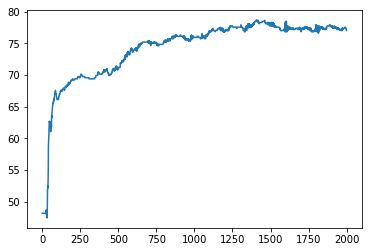

In [27]:
plt.plot(b)
plt.show()

### 3. Explanations with library LIME

<p style="text-align: justify;"><font size="3">
Despite the fact that many models of machine learning are black boxes, understanding the reason behind the model predictions would certainly help users decide when to trust or not on their predictions.
</font></p>

<p style="text-align: justify;"><font size="3">
Local Interpretable Model-Agnostic Explanations(LIME), is a technique to explain the predictions of any Machine Learning classifier and to evaluate its usefulness in various tasks related to trust, like in the figure below.
</font></p>

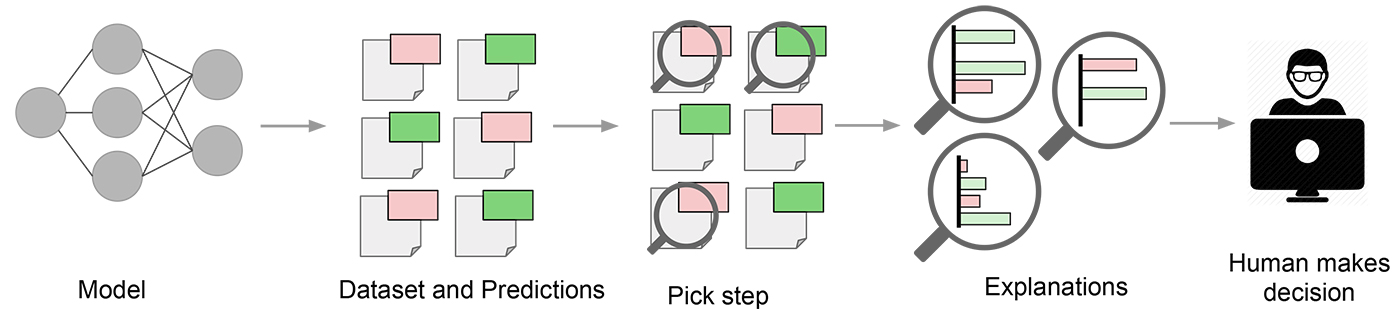

<p style="text-align: justify;"><font size="3">
- <u>Lime</u>: is a library to explain the predictions of black box classifiers (in this case a Neural Network), through the ranking of features. 
</font><p>

In [28]:
import warnings
warnings.simplefilter("ignore")

import lime
import lime.lime_tabular

<p style="text-align: justify;"><font size="3">
In this step, are used two machine learning algorithms based in decision trees to generate the explanations in the Lime library.
</font></p>

In [29]:
model_xgb = XGBClassifier(n_estimators=300, max_depth=5)
model_xgb.fit(encoded_train, labels_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=300,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [30]:
predict_fn = lambda x: model_xgb.predict_proba(encoder.transform(x)).astype(float)

<p style="text-align: justify;"><font size="3">
This step is responsible for creating the tabular explainer. The parameters used by the function are:
</font></p>

   - <p style="text-align: justify;"><font size="3"> train = Training set</font></p>
   - <p style="text-align: justify;"><font size="3">feature_names = Concatenated list of all feature names</font></p>
   - <p style="text-align: justify;"><font size="3">categorical_features = Target values</font></p>
   - <p style="text-align: justify;"><font size="3">kernel width = Control the linearity of the induced model</font></p>

In [31]:
explainer = lime.lime_tabular.LimeTabularExplainer(train,feature_names=feature_names,class_names=class_names,
                                                   categorical_features=categorical_features, 
                                                   categorical_names=categorical_names, kernel_width=3)

<p style="text-align: justify;"><font size="3">
Pick the observation in the validation set for which explanation is required. Get the explanation for the algorithms applyed. In this method, the number of the most relevant features analysed to be shown can be specified.
</font></p>

In [32]:
np.random.seed(1)
i = 100
exp = explainer.explain_instance(test[i], predict_fn, num_features=15)
exp.show_in_notebook(show_all=False)

<p style="text-align: justify;"><font size="3">
Displays the Tabular Explanations.
</font></p>

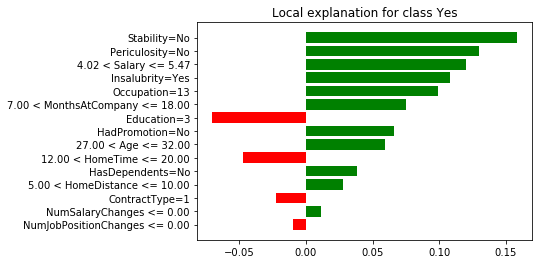

In [34]:
exp.as_pyplot_figure()

<p style="text-align: justify;"><font size="3">
With this data, it is possible to analyze individually the features that influence or not the attrition of the employees. It can be seen that features present in green greater weight for the employee to resign, in the opposite case, with the features present in red greater weight for the employee to continue in the company. In the same analysis, it is still possible to estimate the weight of each feature individually.
</font></p>

In [35]:
i = 10
exp = explainer.explain_instance(test[i], predict_fn, num_features=15)
exp.show_in_notebook(show_all=False)

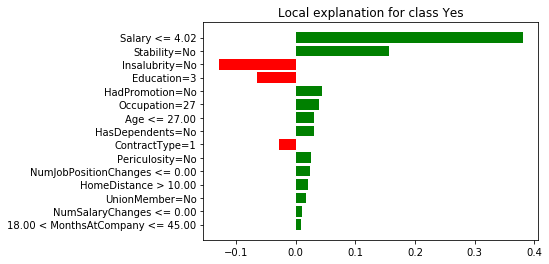

In [38]:
exp.as_pyplot_figure()

### III Results analysis

<p style="text-align: justify;"><font size="3">
The result of the solution by Neural Networks obtained precision of more than 78%, which represents an improviment of almost 10% of the resultant accuracy in the solution by Logistic Regression. As can be seen in both approaches, due to the type of data analyzed, the accuracy of the models was not extremely high. 
</font></p>
<p style="text-align: justify;"><font size="3">
An important factor presented in this approach is the use of the LIME library, which made it possible to explain individual predictions. In this sense, LIME presents itself as an efficient tool to facilitate the confidence of the model. More important then the accuracy of the model itself, understand the factors the lead to the attrition of an employee represent a more expressive knowledge. 
</font></p>




### References

<p style="text-align: justify;"><font size="3">
[1] colocar referencia whitepaper1
</font></p>
<p style="text-align: justify;"><font size="3">
[2] www.medium.com
</font></p>